In [1]:
import sklearn as sk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:/Users/Shahbaz Baig/Desktop/Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<Axes: >

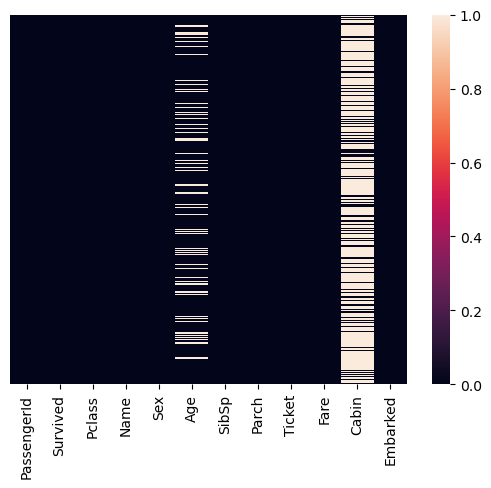

In [3]:
sns.heatmap(df.isnull(),yticklabels=False)

In [4]:
cls=df.groupby('Pclass')['Age'].median()
cls

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

Text(0.5, 1.0, 'Age of passsenger by Class')

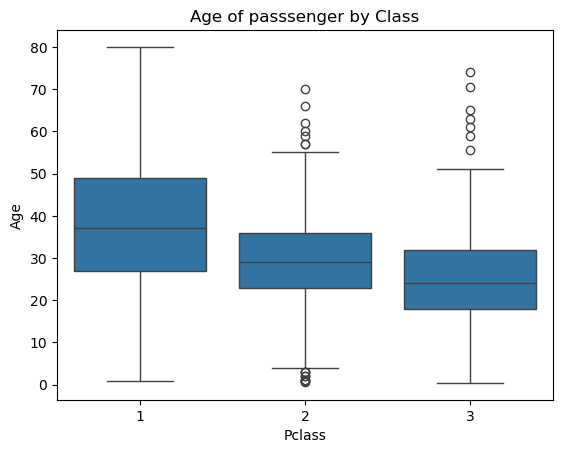

In [5]:
sns.boxplot(x=df['Pclass'],y=df['Age'],data=df).set_title('Age of passsenger by Class')

In [6]:
df.drop(['Cabin'],inplace=True,axis=1)

In [7]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [9]:
def impute(col):
    Age = col[0]                                                
    Pclass = col[1]
    if pd.isnull(Age):
        if Pclass== 1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

#for applying functions
df['Age']=df[['Age','Pclass']].apply(impute,axis=1)
            

In [10]:
df.dropna(inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [12]:
df.drop(['PassengerId','Name'],inplace=True,axis=1)

In [13]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,S
887,1,1,female,19.0,0,0,112053,30.0000,S
888,0,3,female,24.0,1,2,W./C. 6607,23.4500,S
889,1,1,male,26.0,0,0,111369,30.0000,C


In [14]:
df.drop(['Ticket'],axis=1,inplace=True)

In [15]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,24.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [16]:
concet=['Sex','Embarked']
for c in concet:
    df[c]=df[c].astype('category')

In [17]:
print(df["Sex"].dtype)
print(df["Embarked"].dtype)

category
category


In [18]:
sex=pd.get_dummies(df['Sex'],drop_first=True).astype('int')
embarked=pd.get_dummies(df['Embarked'],drop_first=True).astype('int')

In [19]:
df=pd.concat([df,sex,embarked],axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,1,0,1
887,1,1,female,19.0,0,0,30.0000,S,0,0,1
888,0,3,female,24.0,1,2,23.4500,S,0,0,1
889,1,1,male,26.0,0,0,30.0000,C,1,0,0


In [20]:
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'male', 'Q', 'S']]

In [21]:
df.drop(['Sex','Embarked'],inplace=True,axis=1)

In [22]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,24.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


In [23]:
x=df.drop(['Survived'],axis=1)
y=df['Survived']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=101)

In [24]:
from sklearn.linear_model import LogisticRegression
lreg=LogisticRegression()
lreg.fit(x_train,y_train)

LogisticRegression()

In [25]:
pred_y=lreg.predict(x_test)
print(pred_y)
print(pred_y.shape)

[0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1
 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0]
(178,)


In [26]:
from sklearn.metrics import classification_report,accuracy_score
print('--'*30)
acc=round(accuracy_score(y_test,pred_y)*100,3)
print("Accuracy of the model is ",acc,'%')
print('--'*30)

------------------------------------------------------------
Accuracy of the model is  82.022 %
------------------------------------------------------------


In [27]:
from sklearn.tree import DecisionTreeClassifier
dclas=DecisionTreeClassifier()
dclas.fit(x_train,y_train)

DecisionTreeClassifier()

In [28]:
pred_y_dtree=dclas.predict(x_test)
print(pred_y_dtree)
print(pred_y_dtree.shape)

[0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1
 0 0 0 1 0 1 1 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 1 1
 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0
 0 1 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0]
(178,)


In [29]:
from sklearn.metrics import accuracy_score
print('Decision tree Accuracy')
dtree_acc=round(accuracy_score(y_test,pred_y_dtree)*100,3)
print('Accuracy is',dtree_acc,"%")

Decision tree Accuracy
Accuracy is 79.775 %


In [30]:
from sklearn.ensemble import RandomForestClassifier
rf_clas=RandomForestClassifier()
rf_clas.fit(x_train,y_train)

RandomForestClassifier()

In [31]:
pred_y_rf=rf_clas.predict(x_test)
print(pred_y_rf)
print(pred_y_rf.shape)

[0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 1 1
 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1 0 1 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0
 0 1 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0]
(178,)


In [32]:
from sklearn.metrics import accuracy_score
print('Decision tree Accuracy')
dtree_acc=round(accuracy_score(y_test,pred_y_rf)*100,3)
print('Accuracy is',dtree_acc,"%")

Decision tree Accuracy
Accuracy is 82.022 %


In [33]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clas=GradientBoostingClassifier()
gb_clas.fit(x_train,y_train)

GradientBoostingClassifier()

In [34]:
pred_y_gb=gb_clas.predict(x_test)
print(pred_y_gb)
print(pred_y_gb.shape)

[0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 1 0 0 1 0 1 1
 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 0 0
 0 1 1 0 1 0 0 1 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0]
(178,)


In [35]:
from sklearn.metrics import accuracy_score
print('Decision tree Accuracy')
gb_acc=round(accuracy_score(y_test,pred_y_gb)*100,3)
print('Accuracy is',gb_acc,"%")

Decision tree Accuracy
Accuracy is 84.27 %


In [37]:
model_scores={
    'Logistic Regression':82.02,
    'Decision Tree Classifier':78.65,
    'Random Forest Classifier':81.46,
    'Gradient Boosting Classifier':84.27
}
sorted_scores= sorted(model_scores.items(),key=lambda x:x[1],reverse=True)
for rank,(name,score) in enumerate(sorted_scores,start=1):   #rank the model according to their accuracy score. More the accuracy score more better the model is.
    print(f"{rank}. {name} --> {score}")

1. Gradient Boosting Classifier --> 84.27
2. Logistic Regression --> 82.02
3. Random Forest Classifier --> 81.46
4. Decision Tree Classifier --> 78.65
